<a href="https://colab.research.google.com/github/Siddhi-Kumari/data_analysis/blob/main/upliance_assingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install openpyxl


In [3]:
import pandas as pd

path = '/content/drive/MyDrive/datasets_intern/Data Analyst Intern Assignment - Excel.xlsx'
data = pd.read_excel(path, sheet_name=None)
print(data.keys())


dict_keys(['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv'])


In [6]:
user_details = data['UserDetails.csv']
cooking_sessions = data['CookingSessions.csv']
order_details = data['OrderDetails.csv']

In [7]:
print("User Details:")
print(user_details.head())


User Details:
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  


In [8]:
print("\nCooking Sessions:")
print(cooking_sessions.head())


Cooking Sessions:
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00   
2       S003    U003  Grilled Chicken     Dinner 2024-12-02 19:30:00   
3       S004    U001         Pancakes  Breakfast 2024-12-02 07:30:00   
4       S005    U004     Caesar Salad      Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating  
0 2024-12-01 19:30:00               30             4.5  
1 2024-12-01 12:20:00               20             4.0  
2 2024-12-02 20:10:00               40             4.8  
3 2024-12-02 08:00:00               30             4.2  
4 2024-12-03 13:15:00               15             4.7  


In [9]:
print("\nOrder Details:")
print(order_details.head())


Order Details:
   Order ID User ID Order Date  Meal Type        Dish Name Order Status  \
0      1001    U001 2024-12-01     Dinner        Spaghetti    Completed   
1      1002    U002 2024-12-01      Lunch     Caesar Salad    Completed   
2      1003    U003 2024-12-02     Dinner  Grilled Chicken     Canceled   
3      1004    U001 2024-12-02  Breakfast         Pancakes    Completed   
4      1005    U004 2024-12-03      Lunch     Caesar Salad    Completed   

   Amount (USD) Time of Day  Rating Session ID  
0          15.0       Night     5.0       S001  
1          10.0         Day     4.0       S002  
2          12.5       Night     NaN       S003  
3           8.0     Morning     4.0       S004  
4           9.0         Day     4.0       S005  


Data Cleaning

In [10]:
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())


User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


Missing data

In [12]:
order_details = order_details.dropna(subset=['Rating'])


**Merge** user_details with cooking_sessions

In [13]:
merged_data = pd.merge(cooking_sessions, user_details, on='User ID', how='left')


Merge the result with order_details:



In [14]:
final_data = pd.merge(merged_data, order_details, on=['Session ID', 'User ID'], how='left')


ORDER STATS

In [15]:
user_order_stats = final_data.groupby('User Name')['Order ID'].count().sort_values(ascending=False)
print(user_order_stats)


User Name
Alice Johnson    3
Bob Smith        3
Charlie Lee      3
David Brown      2
Emma White       2
Frank Green      1
Grace King       1
Henry Lee        1
Name: Order ID, dtype: int64


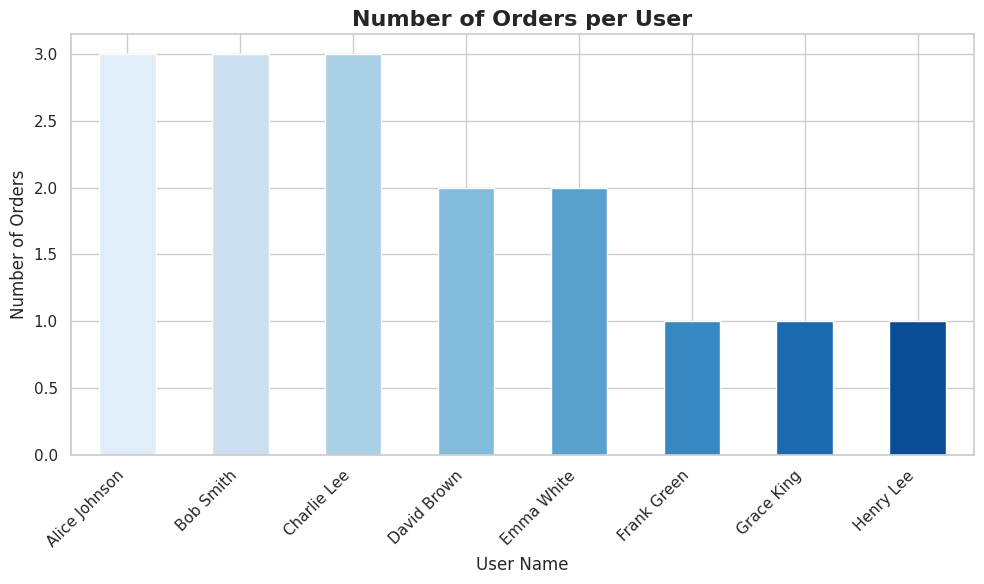

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
user_order_stats.plot(kind='bar', color=sns.color_palette("Blues", n_colors=len(user_order_stats)))
plt.title('Number of Orders per User', fontsize=16, fontweight='bold')
plt.xlabel('User Name', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Popular Dishes**

In [16]:
popular_dishes = order_details['Dish Name'].value_counts()
print(popular_dishes)


Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


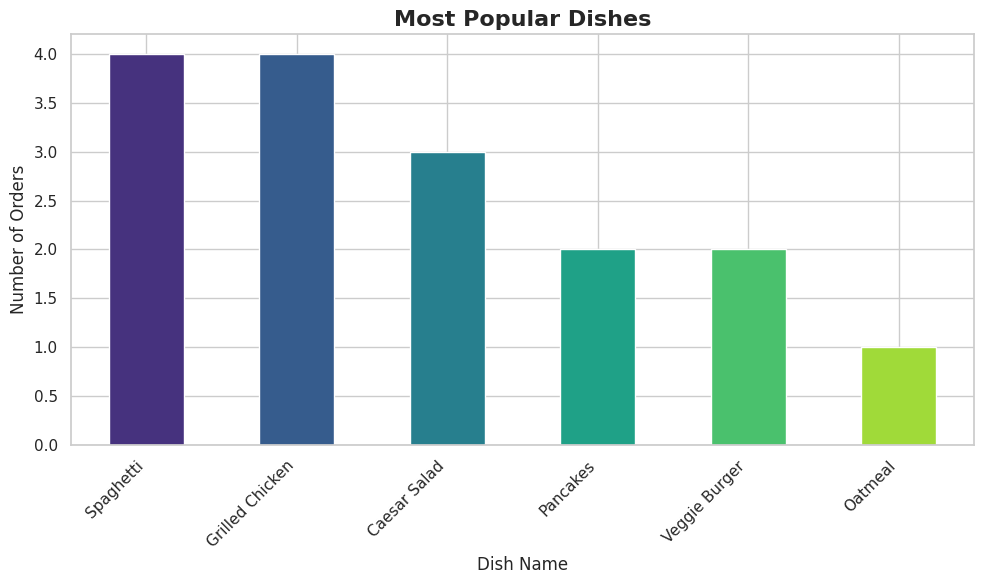

In [28]:
plt.figure(figsize=(10, 6))
popular_dishes.plot(kind='bar', color=sns.color_palette("viridis", n_colors=len(popular_dishes)))
plt.title('Most Popular Dishes', fontsize=16, fontweight='bold')
plt.xlabel('Dish Name', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Age Analysis**

In [18]:
age_analysis = final_data.groupby('Age')['Order ID'].count()
print(age_analysis)


Age
25    1
27    2
28    3
30    2
31    1
35    3
38    1
42    3
Name: Order ID, dtype: int64


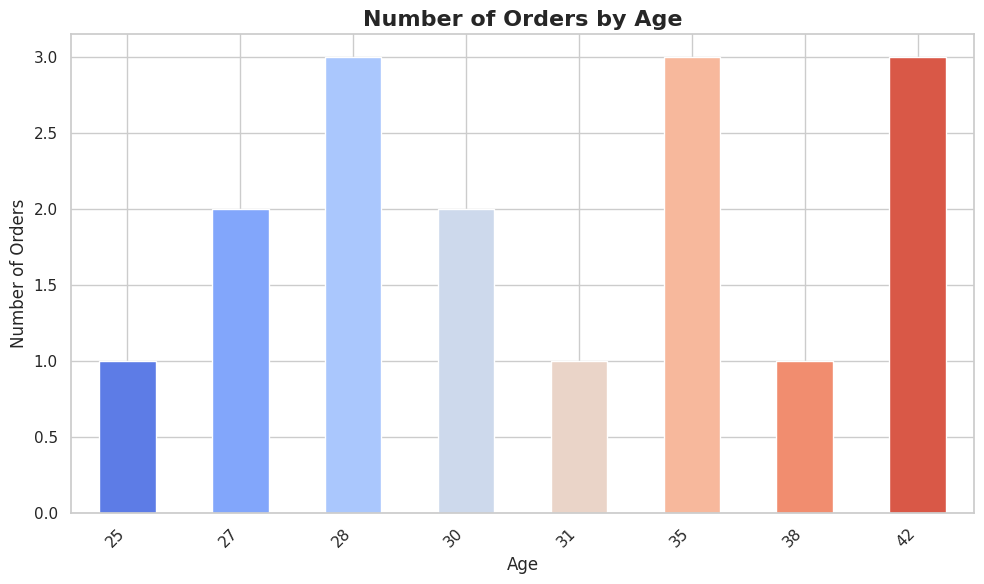

In [29]:
plt.figure(figsize=(10, 6))
age_analysis.plot(kind='bar', color=sns.color_palette("coolwarm", n_colors=len(age_analysis)))
plt.title('Number of Orders by Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Location Analysis**

In [19]:
location_analysis = final_data.groupby('Location')['Order ID'].count()
print(location_analysis)


Location
Austin           1
Boston           1
Chicago          3
Los Angeles      3
Miami            1
New York         3
San Francisco    2
Seattle          2
Name: Order ID, dtype: int64


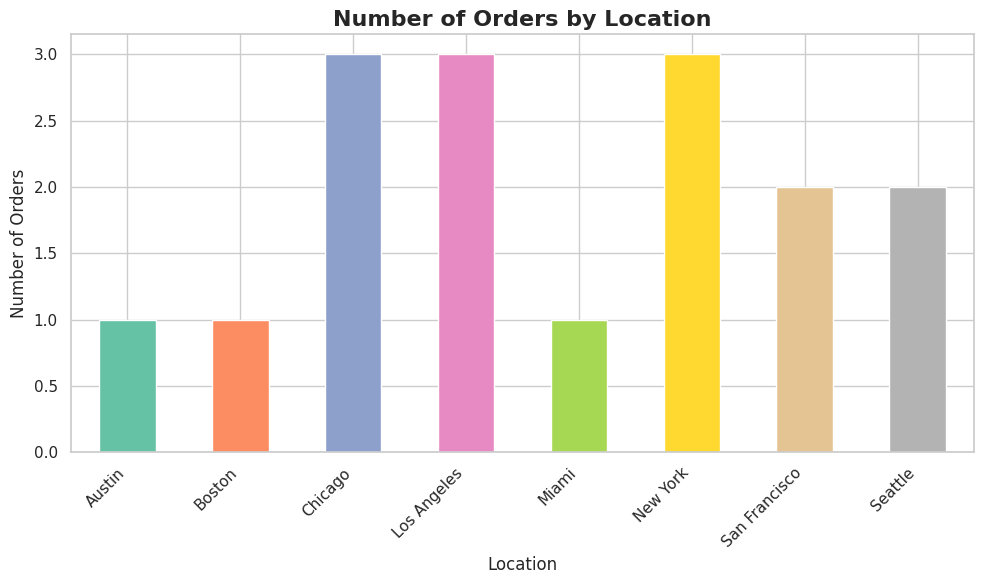

In [30]:
plt.figure(figsize=(10, 6))
location_analysis.plot(kind='bar', color=sns.color_palette("Set2", n_colors=len(location_analysis)))
plt.title('Number of Orders by Location', fontsize=16, fontweight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Meal AnalysisA**

In [20]:
favorite_meal_analysis = final_data.groupby('Favorite Meal')['Order ID'].count()
print(favorite_meal_analysis)


Favorite Meal
Breakfast    4
Dinner       7
Lunch        5
Name: Order ID, dtype: int64


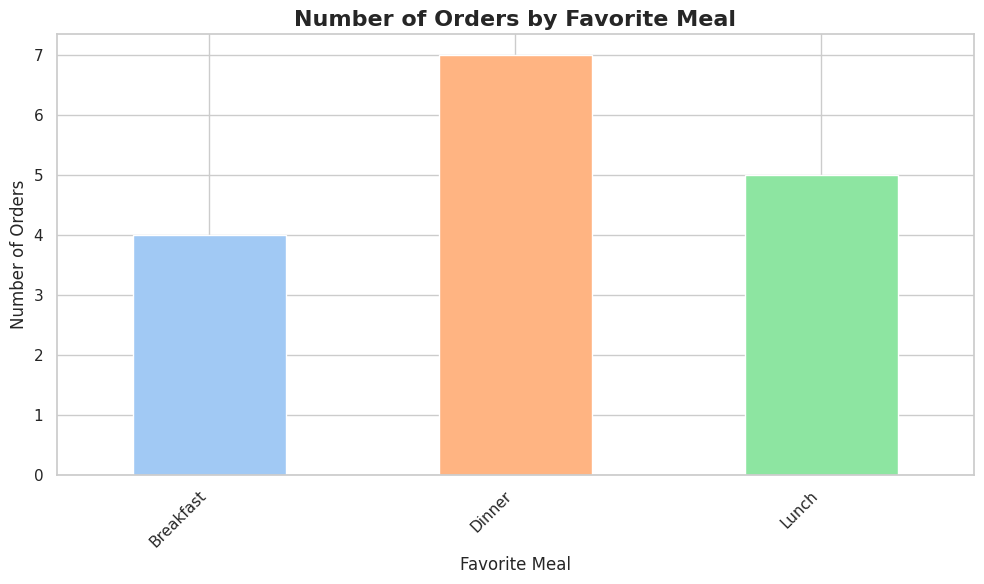

In [31]:
plt.figure(figsize=(10, 6))
favorite_meal_analysis.plot(kind='bar', color=sns.color_palette("pastel", n_colors=len(favorite_meal_analysis)))
plt.title('Number of Orders by Favorite Meal', fontsize=16, fontweight='bold')
plt.xlabel('Favorite Meal', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

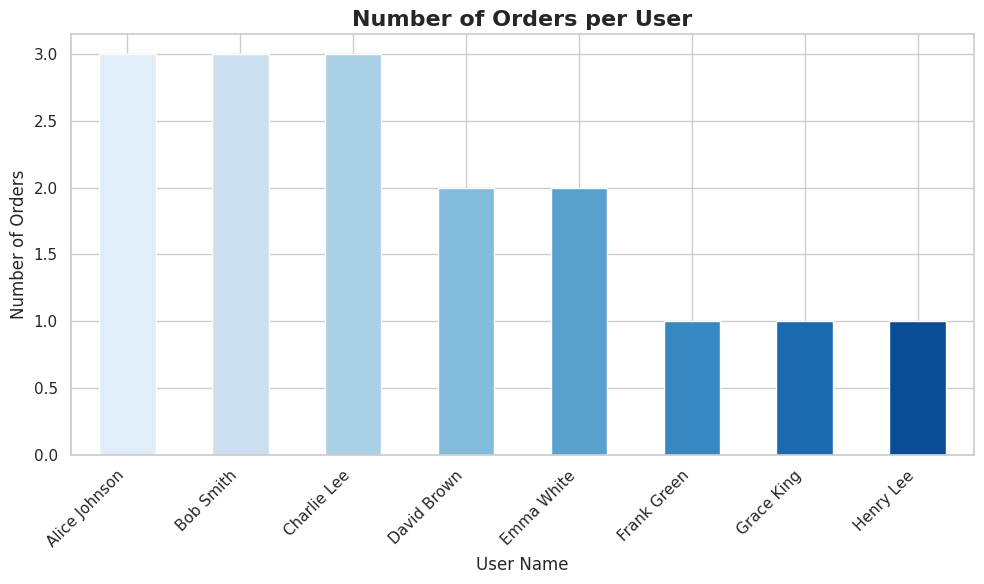

In [37]:
# Saving the figures
plt.figure(figsize=(10, 6))
user_order_stats.plot(kind='bar', color=sns.color_palette("Blues", n_colors=len(user_order_stats)))
plt.title('Number of Orders per User', fontsize=16, fontweight='bold')
plt.xlabel('User Name', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('user_order_stats.png')  # Save the image

# Repeat for other plots, changing the filename accordingly
